**CS 5834, Fall 2020: Intro to Urban Computing Project - Association Rules analysis for Gentrification using Chicago Data Set**




### Imports and Mount File Directories


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
# modify "customized_path_to_homework", path of folder in drive, where you project is stored
customized_path_to_homework = "/content/drive/My Drive/cs5834/urbcomp_fall2020/project"
file_name = "Chicago_typology_output.csv"

sys.path.append(customized_path_to_homework)

In [ ]:
%cd $customized_path_to_homework/data

/content/drive/My Drive/cs5834/urbcomp_fall2020/project/data


In [ ]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import datetime
import warnings


In [ ]:

"""
sys.path.insert(0,'../')
%load_ext autoreload
%autoreload 2
import nyctaxi_helpers
warnings.filterwarnings('ignore')
"""

"\nsys.path.insert(0,'../')\n%load_ext autoreload\n%autoreload 2\nimport nyctaxi_helpers\nwarnings.filterwarnings('ignore')\n"

In [ ]:
pip install --upgrade mlxtend


Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.18.0)


In [ ]:
#ref https://pbpython.com/market-basket-analysis.html


#may need to install mlxtend package - pip install mlxtend in console
import pandas as pd
#from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


# **Process Urban Displacement Model Data for Gentrificaiton**


Reference: https://www.urbandisplacement.org/open-source-project

Based on the work https://ww2.arb.ca.gov/sites/default/files/classic//research/apr/past/13-310.pdf?_ga=2.269282425.968981409.1605209194-851335111.1605209194

**Developing a New
Methodology for Analyzing
Potential Displacement**

University of California, Berkeley

Principal Investigator:
Karen Chapple 

https://ww3.arb.ca.gov/research/single-project.php?row_id=65188

**Obtain the Data**

Data can be found at https://github.com/urban-displacement/displacement-typologies/blob/main/data/outputs/typologies/LosAngeles_typology_output.csv

In [ ]:
download_file = ("https://raw.githubusercontent.com/urban-displacement/displacement-typologies/main/data/outputs/typologies/{}".format(file_name))

In [ ]:

#!wget -nc $download_file

In [ ]:
## Process Data - if data file already processed then can start at Associaton Rules section
# get the Data File

#df = pd.read_csv("https://raw.githubusercontent.com/urban-displacement/displacement-typologies/main/data/outputs/typologies/{}".format(file_name), index_col=0)
df = pd.read_csv("{}/data/{}".format(customized_path_to_homework, file_name), index_col=0)

# sneak peak in the data
df.head(10)


,pop_18,white_18,hh_18,hinc_18,mhval_18,mhval_18_se,mrent_18,mrent_18_se,total_25_18,total_25_col_bd_18,total_25_col_md_18,total_25_col_pd_18,total_25_col_phd_18,tot_units_built_18,units_40_49_built_18,units_39_early_built_18,ohu_18,rhu_18,mmhcosts_18,iinc_18,mov_wc_w_income_18,mov_wc_9000_18,mov_wc_15000_18,mov_wc_25000_18,mov_wc_35000_18,mov_wc_50000_18,mov_wc_65000_18,mov_wc_75000_18,mov_wc_76000_more_18,mov_oc_w_income_18,mov_oc_9000_18,mov_oc_15000_18,mov_oc_25000_18,state_x,county_x,tract_x,mov_oc_35000_18,mov_oc_50000_18,mov_oc_65000_18,mov_oc_75000_18,...,aboverm_pctch_real_mrent_12_18,aboverm_pctch_real_mhval_90_00,aboverm_pctch_real_mrent_90_00,lostli_00,lostli_18,aboverm_pctch_real_hinc_90_00,aboverm_pctch_real_hinc_00_18,aboverm_ch_per_col_90_00,aboverm_ch_per_col_00_18,aboverm_per_units_pre50_18,GEOID,rail,presence_ph_LIHTC,vul_gent_90,vul_gent_00,vul_gent_18,hotmarket_00,hotmarket_18,gent_90_00,gent_90_00_urban,gent_00_18,gent_00_18_urban,dp_PChRent,dp_RentGap,tr_rent_gap,rm_rent_gap,dense,SAE,AdvG,ARE,BE,SMMI,ARG,EOG,OD,OD_loss,LISD,double_counted,typology,typ_cat
0,2344.0,1199.0,866.0,49565.0,124400.0,6926.0,969.0,38.0,1532.0,98.0,58.0,8.0,4.0,950.0,127.0,295.0,427.0,439.0,965.0,26602.0,164.0,54.0,6.0,25.0,46.0,12.0,9.0,3.0,9.0,24.0,4.0,4.0,7.0,17,197,882900,0.0,4.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,1,17197882900,0,False,0,1,1,0.0,0.0,0,0,0,0,0,1,81.784111,20.207763,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,1.0,3.0,['ARG']
1,3759.0,1276.0,1183.0,46175.0,123400.0,10896.0,1019.0,273.0,2665.0,168.0,47.0,39.0,11.0,1266.0,206.0,153.0,542.0,641.0,1010.0,21376.0,127.0,21.0,7.0,39.0,34.0,22.0,0.0,0.0,4.0,69.0,15.0,7.0,0.0,17,197,883000,37.0,0.0,10.0,0.0,...,1,0,0,0,0,0,0,0,0,1,17197883000,0,False,1,1,1,0.0,1.0,0,0,0,0,1,0,-6.293498,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
2,3726.0,1295.0,1099.0,80230.0,159400.0,6619.0,1764.0,87.0,2278.0,439.0,93.0,30.0,10.0,1186.0,9.0,14.0,893.0,206.0,1471.0,28768.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,10.0,17,197,880111,0.0,17.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0,17197880111,0,False,0,0,0,0.0,1.0,0,0,0,0,1,0,-179.068745,20.207763,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
3,5692.0,4076.0,2429.0,71444.0,168400.0,16402.0,854.0,56.0,4421.0,703.0,364.0,21.0,0.0,2617.0,28.0,254.0,2233.0,196.0,1329.0,41679.0,77.0,0.0,0.0,31.0,25.0,0.0,0.0,8.0,13.0,456.0,136.0,13.0,31.0,17,197,883602,76.0,72.0,45.0,0.0,...,0,1,1,1,0,1,0,0,0,0,17197883602,0,False,1,0,0,1.0,0.0,0,0,0,0,0,1,386.866604,20.207763,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
4,2756.0,368.0,1439.0,41193.0,119200.0,19150.0,947.0,64.0,1847.0,273.0,133.0,0.0,0.0,1570.0,52.0,35.0,248.0,1191.0,960.0,30259.0,52.0,0.0,0.0,8.0,0.0,11.0,0.0,33.0,0.0,254.0,25.0,19.0,33.0,17,197,883803,83.0,54.0,40.0,0.0,...,0,0,0,0,0,0,1,1,0,0,17197883803,0,False,1,1,1,0.0,1.0,0,0,0,0,0,1,85.803400,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
5,3375.0,2384.0,1320.0,69250.0,161300.0,10246.0,1199.0,228.0,2373.0,537.0,324.0,16.0,20.0,1485.0,255.0,502.0,1066.0,254.0,1201.0,34135.0,145.0,35.0,26.0,15.0,10.0,31.0,22.0,0.0,6.0,97.0,12.0,33.0,9.0,17,197,881700,0.0,0.0,0.0,34.0,...,0,0,0,0,0,0,0,0,0,1,17197881700,0,False,0,0,0,0.0,0.0,0,0,0,0,0,0,-101.649106,20.207763,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
6,5358.0,4574.0,2158.0,92984.0,306400.0,23669.0,2073.0,833.0,4089.0,955.0,572.0,123.0,133.0,2261.0,16.0,110.0,1981.0,177.0,1442.0,47201.0,70.0,32.0,0.0,0.0,7.0,24.0,0.0,0.0,7.0,83.0,7.0,0.0,0.0,17,197,883504,0.0,0.0,22.0,0.0,...,1,0,0,0,0,0,0,0,1,0,17197883504,0,False,0,0,0,0.0,1.0,0,0,0,0,1,0,-583.758440,20.207763,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
7,3204.0,2267.0,1460.0,49732.0,95700.0,20588.0,767.0,147.0,2219.0,204.0,140.0,0.0,18.0,1639.0,152.0,274.0,1033.0,427.0,874.0,27875.0,85.0,12.0,11.0,0.0,43.0,0.0,0.0,19.0,0.0,26.0,0.0,5.0,21.0,17,197,883700,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,1,0,1,17197883700,0,True,0,1,0,1.0,0.0,0,0,0,0,0,1,160.206890,20.207763,0,0.0,0.0,

In [ ]:
df.columns

Index(['pop_18', 'white_18', 'hh_18', 'hinc_18', 'mhval_18', 'mhval_18_se',
       'mrent_18', 'mrent_18_se', 'total_25_18', 'total_25_col_bd_18',
       ...
       'BE', 'SMMI', 'ARG', 'EOG', 'OD', 'OD_loss', 'LISD', 'double_counted',
       'typology', 'typ_cat'],
      dtype='object', length=305)

In [ ]:
"""
# create a working copy of the data to process
df2 = df.copy()

#removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00',
df2 = df2[[ 'inc80_18',
 'inc120_18',
 'inc80_00',
 'inc120_00',
 'inc80_90',
 'low_80120_18',
 'mod_80120_18',
 'high_80120_18',
 'low_pdmt_medhhinc_18',
 'high_pdmt_medhhinc_18',
 'mod_pdmt_medhhinc_18',
 'mix_low_medhhinc_18',
 'mix_mod_medhhinc_18',
 'mix_high_medhhinc_18',

 'low_80120_00',
 'mod_80120_00',
 'high_80120_00',
 'low_pdmt_medhhinc_00',
 'high_pdmt_medhhinc_00',
 'mod_pdmt_medhhinc_00',
 'mix_low_medhhinc_00',
 'mix_mod_medhhinc_00',
 'mix_high_medhhinc_00',

 'per_all_li_90',
 'per_all_li_00',
 'per_all_li_18',
 'per_nonwhite_90',
 'per_nonwhite_00',
 'per_nonwhite_18',
 'per_rent_90',
 'per_rent_00',
 'per_rent_18',
 'per_col_90',
 'per_col_00',
 'per_col_18',
 'per_units_pre50_18',
 'per_limove_18',
 'per_limove_12',
 'lmh_flag_category',
 'pctch_real_mhval_00_18',
 'pctch_real_mrent_12_18',
 'rent_decrease',
 'rent_marginal',
 'rent_increase',
 'rent_rapid_increase',
 'house_decrease',
 'house_marginal',
 'house_increase',
 'house_rapid_increase',
 'tot_decrease',
 'tot_marginal',
 'tot_increase',
 'tot_rapid_increase',
 'change_flag_category',
 'per_ch_zillow_12_18',
 'ab_50pct_ch',
 'ab_90percentile_ch',
 'rent_50pct_ch',
 'rent_90percentile_ch',
 'hv_abrm_ch',
 'rent_abrm_ch',
 'pctch_real_mhval_90_00',
 'pctch_real_mrent_90_00',
 'pctch_real_hinc_90_00',
 'pctch_real_mrent_00_18',
 'pctch_real_hinc_00_18',
 'ch_per_col_90_00',
 'ch_per_col_00_18',
 'ch_per_limove_12_18',
 'aboverm_per_all_li_90',
 'aboverm_per_all_li_00',
 'aboverm_per_all_li_18',
 'aboverm_per_nonwhite_18',
 'aboverm_per_nonwhite_90',
 'aboverm_per_nonwhite_00',
 'aboverm_per_rent_90',
 'aboverm_per_rent_00',
 'aboverm_per_rent_18',
 'aboverm_per_col_90',
 'aboverm_per_col_00',
 'aboverm_per_col_18',
 'aboverm_real_mrent_90',
 'aboverm_real_mrent_00',
 'aboverm_real_mrent_12',
 'aboverm_real_mrent_18',
 'aboverm_real_mhval_90',
 'aboverm_real_mhval_00',
 'aboverm_real_mhval_18',
 'aboverm_pctch_real_mhval_00_18',
 'aboverm_pctch_real_mrent_00_18',
 'aboverm_pctch_real_mrent_12_18',
 'aboverm_pctch_real_mhval_90_00',
 'aboverm_pctch_real_mrent_90_00',
 'lostli_00',
 'lostli_18',
 'aboverm_pctch_real_hinc_90_00',
 'aboverm_pctch_real_hinc_00_18',
 'aboverm_ch_per_col_90_00',
 'aboverm_ch_per_col_00_18',
 'aboverm_per_units_pre50_18',
 'GEOID',
 'rail',
 'presence_ph_LIHTC',
 'hotmarket_00',
 'hotmarket_18',
 'dp_PChRent',
 'dp_RentGap',
 'dense',
 'typology']]


# drop rows which dont have a gentrification category
df2.dropna(subset=['typology'], inplace=True)
df2 = df2.set_index('GEOID')

#fill the nas
df2.fillna(0.0, inplace=True)


df2.head(10)
"""

"\n# create a working copy of the data to process\ndf2 = df.copy()\n\n#removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00',\ndf2 = df2[[ 'inc80_18',\n 'inc120_18',\n 'inc80_00',\n 'inc120_00',\n 'inc80_90',\n 'low_80120_18',\n 'mod_80120_18',\n 'high_80120_18',\n 'low_pdmt_medhhinc_18',\n 'high_pdmt_medhhinc_18',\n 'mod_pdmt_medhhinc_18',\n 'mix_low_medhhinc_18',\n 'mix_mod_medhhinc_18',\n 'mix_high_medhhinc_18',\n\n 'low_80120_00',\n 'mod_80120_00',\n 'high_80120_00',\n 'low_pdmt_medhhinc_00',\n 'high_pdmt_medhhinc_00',\n 'mod_pdmt_medhhinc_00',\n 'mix_low_medhhinc_00',\n 'mix_mod_medhhinc_00',\n 'mix_high_medhhinc_00',\n\n 'per_all_li_90',\n 'per_all_li_00',\n 'per_all_li_18',\n 'per_nonwhite_90',\n 'per_nonwhite_00',\n 'per_nonwhite_18',\n 'per_rent_90',\n 'per_rent_00',\n 'per_rent_18',\n 'per_col_90',\n 'per_col_00',\n 'per_col_18',\n 'per_units_pre50_18',\n 'per_limove_18',\n 'per_limove_12',\n 'lmh_flag_category',\n 'pctch_real_mhval_00_18',\n 'pctch_real_mrent_1

In [ ]:
# create a working copy of the data to process
df2 = df.copy()

"""
removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00', 
'inc80_18',
 'inc120_18',
 'inc80_00',
 'inc120_00',
 'inc80_90',
  'per_col_90',
 'per_col_00',
 'per_col_18',
  'tot_decrease',
 'tot_marginal',
 'tot_increase',
 'tot_rapid_increase',
  'pctch_real_mhval_90_00',
 'pctch_real_mrent_90_00',
 'pctch_real_mrent_00_18',
 'per_units_pre50_18',
  
"""

df2.head(10)
df2 = df2[[ 

 'low_80120_18',
 'mod_80120_18',
 'high_80120_18',
 'low_pdmt_medhhinc_18',
 'high_pdmt_medhhinc_18',
 'mod_pdmt_medhhinc_18',
 'mix_low_medhhinc_18',
 'mix_mod_medhhinc_18',
 'mix_high_medhhinc_18',

 'low_80120_00',
 'mod_80120_00',
 'high_80120_00',
 'low_pdmt_medhhinc_00',
 'high_pdmt_medhhinc_00',
 'mod_pdmt_medhhinc_00',
 'mix_low_medhhinc_00',
 'mix_mod_medhhinc_00',
 'mix_high_medhhinc_00',

 'per_all_li_90',
 'per_all_li_00',
 'per_all_li_18',
 'per_nonwhite_90',
 'per_nonwhite_00',
 'per_nonwhite_18',
 'per_rent_90',
 'per_rent_00',
 'per_rent_18',

 
 'per_limove_18',
 'per_limove_12',
 'lmh_flag_category',
 'pctch_real_mhval_00_18',
 'pctch_real_mrent_12_18',
 'rent_decrease',
 'rent_marginal',
 'rent_increase',
 'rent_rapid_increase',
 'house_decrease',
 'house_marginal',
 'house_increase',
 'house_rapid_increase',

 'change_flag_category',
 'per_ch_zillow_12_18',
 'ab_50pct_ch',
 'ab_90percentile_ch',
 'rent_50pct_ch',
 'rent_90percentile_ch',
 'hv_abrm_ch',
 'rent_abrm_ch',

 'pctch_real_hinc_90_00',
 
 'pctch_real_hinc_00_18',
 'ch_per_col_90_00',
 'ch_per_col_00_18',
 'ch_per_limove_12_18',
 'aboverm_per_all_li_90',
 'aboverm_per_all_li_00',
 'aboverm_per_all_li_18',
 'aboverm_per_nonwhite_18',
 'aboverm_per_nonwhite_90',
 'aboverm_per_nonwhite_00',
 'aboverm_per_rent_90',
 'aboverm_per_rent_00',
 'aboverm_per_rent_18',
 'aboverm_per_col_90',
 'aboverm_per_col_00',
 'aboverm_per_col_18',
 'aboverm_real_mrent_90',
 'aboverm_real_mrent_00',
 'aboverm_real_mrent_12',
 'aboverm_real_mrent_18',
 'aboverm_real_mhval_90',
 'aboverm_real_mhval_00',
 'aboverm_real_mhval_18',
 'aboverm_pctch_real_mhval_00_18',
 'aboverm_pctch_real_mrent_00_18',
 'aboverm_pctch_real_mrent_12_18',
 'aboverm_pctch_real_mhval_90_00',
 'aboverm_pctch_real_mrent_90_00',
 'lostli_00',
 'lostli_18',
 'aboverm_pctch_real_hinc_90_00',
 'aboverm_pctch_real_hinc_00_18',
 'aboverm_ch_per_col_90_00',
 'aboverm_ch_per_col_00_18',
 'aboverm_per_units_pre50_18',
 'GEOID',
 'rail',
 'presence_ph_LIHTC',
 'hotmarket_00',
 'hotmarket_18',
 'dp_PChRent',
 'dp_RentGap',
 'dense',
 'typology']]

# drop rows which dont have a gentrification category
df2.dropna(subset=['typology'], inplace=True)
df2 = df2.set_index('GEOID')

#fill the nas
df2.fillna(0.0, inplace=True)


df2.head(10)

,low_80120_18,mod_80120_18,high_80120_18,low_pdmt_medhhinc_18,high_pdmt_medhhinc_18,mod_pdmt_medhhinc_18,mix_low_medhhinc_18,mix_mod_medhhinc_18,mix_high_medhhinc_18,low_80120_00,mod_80120_00,high_80120_00,low_pdmt_medhhinc_00,high_pdmt_medhhinc_00,mod_pdmt_medhhinc_00,mix_low_medhhinc_00,mix_mod_medhhinc_00,mix_high_medhhinc_00,per_all_li_90,per_all_li_00,per_all_li_18,per_nonwhite_90,per_nonwhite_00,per_nonwhite_18,per_rent_90,per_rent_00,per_rent_18,per_limove_18,per_limove_12,lmh_flag_category,pctch_real_mhval_00_18,pctch_real_mrent_12_18,rent_decrease,rent_marginal,rent_increase,rent_rapid_increase,house_decrease,house_marginal,house_increase,house_rapid_increase,...,ch_per_limove_12_18,aboverm_per_all_li_90,aboverm_per_all_li_00,aboverm_per_all_li_18,aboverm_per_nonwhite_18,aboverm_per_nonwhite_90,aboverm_per_nonwhite_00,aboverm_per_rent_90,aboverm_per_rent_00,aboverm_per_rent_18,aboverm_per_col_90,aboverm_per_col_00,aboverm_per_col_18,aboverm_real_mrent_90,aboverm_real_mrent_00,aboverm_real_mrent_12,aboverm_real_mrent_18,aboverm_real_mhval_90,aboverm_real_mhval_00,aboverm_real_mhval_18,aboverm_pctch_real_mhval_00_18,aboverm_pctch_real_mrent_00_18,aboverm_pctch_real_mrent_12_18,aboverm_pctch_real_mhval_90_00,aboverm_pctch_real_mrent_90_00,lostli_00,lostli_18,aboverm_pctch_real_hinc_90_00,aboverm_pctch_real_hinc_00_18,aboverm_ch_per_col_90_00,aboverm_ch_per_col_00_18,aboverm_per_units_pre50_18,rail,presence_ph_LIHTC,hotmarket_00,hotmarket_18,dp_PChRent,dp_RentGap,dense,typology
GEOID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17197882900,0.520528,0.177630,0.301841,0.0,0.0,0.0,1.0,0.0,0.0,0.399104,0.228882,0.372014,0.0,0.0,0.0,0.0,1.0,0.0,0.355194,0.399104,0.520528,0.137443,0.227295,0.488481,0.326083,0.380776,0.506928,0.563848,0.430200,aff_predominantly_LI,-0.126608,0.010385,0,1,0,0,1,0,0,0,...,0.133649,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,False,0.0,0.0,0,1,0,3.0
17197883000,0.583560,0.198058,0.218382,1.0,0.0,0.0,0.0,0.0,0.0,0.502811,0.134037,0.363152,0.0,0.0,0.0,1.0,0.0,0.0,0.339425,0.502811,0.583560,0.428673,0.537263,0.660548,0.355314,0.330941,0.541843,0.471847,0.792614,aff_mix_mod,-0.101853,0.127786,0,0,1,0,1,0,0,0,...,-0.320766,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,False,0.0,1.0,1,0,0,1.0
17197880111,0.311385,0.199238,0.489378,0.0,0.0,0.0,0.0,0.0,1.0,0.114237,0.253235,0.632528,0.0,1.0,0.0,0.0,0.0,0.0,0.091189,0.114237,0.311385,0.207156,0.384428,0.652442,0.083775,0.064586,0.187443,0.233906,0.371862,aff_predominantly_MI,-0.096418,0.090727,0,0,1,0,1,0,0,0,...,-0.137955,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,False,0.0,1.0,1,0,0,7.0
17197883602,0.256375,0.320517,0.423108,0.0,0.0,0.0,0.0,1.0,0.0,0.260364,0.140635,0.599001,0.0,1.0,0.0,0.0,0.0,0.0,0.291458,0.260364,0.256375,0.615166,0.088092,0.283907,0.357544,0.123288,0.080692,0.414701,0.463886,aff_mix_mod,-0.269149,-0.173610,1,0,0,0,1,0,0,0,...,-0.049186,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,False,1.0,0.0,0,1,0,7.0
17197883803,0.642814,0.194257,0.162929,1.0,0.0,0.0,0.0,0.0,0.0,0.393788,0.213577,0.392635,0.0,0.0,0.0,1.0,0.0,0.0,0.331583,0.393788,0.642814,0.229177,0.366864,0.866473,0.648158,0.582819,0.827658,0.352645,0.422180,aff_predominantly_LI,0.196604,-0.005649,0,1,0,0,0,0,1,0,...,-0.069535,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,False,0.0,1.0,0,1,0,1.0
17197881700,0.351851,0.204121,0.444028,0.0,0.0,0.0,0.0,1.0,0.0,0.300415,0.197425,0.502160,0.0,0.0,0.0,0.0,1.0,0.0,0.267786,0.300415,0.351851,0.042250,0.088182,0.293630,0.137072,0.151141,0.192424,0.464516,0.502748,aff_mix_mod,-0.034209,0.016162,0,1,0,0,0,1,0,0,...,-0.038231,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,False,0.0,0.0,0,0,0,7.0
17197883504,0.298105,0.156605,0.545289,0.0,0.0,0.0,0.0,0.0,1.0,0.244708,0.130479,0.624814,0.0,1.0,0.0,0.0,0.0,0.0,0.089562,0.244708,0.298105,0.019397,0.065448,0.146323,0.192448,0.094923,0.082020,0.255282,0.

Correlation Heatmap

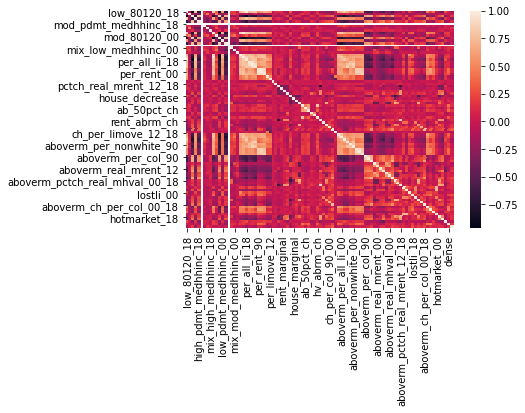

In [ ]:
import seaborn as sns

sns.heatmap(df2.corr())

In [ ]:
#df2.corr()['inc80_18'] > 0.9


In [ ]:
#ref: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

# Create correlation matrix
corr_matrix = df2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [ ]:
to_drop

['high_80120_18',
 'high_80120_00',
 'per_all_li_00',
 'per_all_li_18',
 'per_rent_00']

In [ ]:
# Drop features 
#df2.drop(df[to_drop], axis=1)

### Convert select continous variables to categorical and one hot encode 

In [ ]:
# convert already dummy variables from float to int
dummy_var_list = ['hotmarket_00', 'hotmarket_18', 'low_pdmt_medhhinc_00', 'high_pdmt_medhhinc_00', 'mod_pdmt_medhhinc_00',
                  'mix_low_medhhinc_00', 'mix_mod_medhhinc_00',  'mix_high_medhhinc_00', 'low_pdmt_medhhinc_18', 'high_pdmt_medhhinc_18',
                  'mod_pdmt_medhhinc_18', 'mix_low_medhhinc_18', 'mix_mod_medhhinc_18', 'mix_high_medhhinc_18', 'presence_ph_LIHTC',
                  'typology']
for dummycol in dummy_var_list:
  df2.loc[:,(dummycol)] = df2[dummycol].astype(int, copy=False)

In [ ]:
# use float variables to represent each categorical variable by dividing into quartiles
def convert_percents_to_dummy_vars(X):

    columns = X.columns

    bin_labels_4 = ['VL', 'L', 'H',  'VH']


    for i in range(0, len(columns)):
        if X[columns[i]].dtype=='float64':
          print("Processing: " + columns[i])

          X[columns[i]] = X[columns[i]].fillna(0)
          cat_label = "{}_cat".format(columns[i])
          dummy_label = "{}_dummy".format(columns[i])
          X[cat_label] = pd.qcut(X[columns[i]], 
                                 4,
                              precision=5,
                              duplicates = 'drop',
                              labels=bin_labels_4)
          X = pd.get_dummies(X, columns=[cat_label], prefix=[dummy_label])
          X = X.drop([columns[i]], axis=1)

    return X

In [ ]:
# check if categorical then convert to dummy using label and onehot encoding
def convert_categorical_to_dummy_vars(X):

    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder    

    columns = X.columns
    indices = X.index
    new_columns = []
    encoded_x = None

    for i in range(0, len(columns)):
        if X[columns[i]].dtype=='O':
          print("Processing: " + columns[i])


          label_encoder = LabelEncoder()
          le = label_encoder.fit(X[columns[i]].apply(str))
          for class_ in le.classes_:
              new_columns.append("{}_{}".format(columns[i],class_))
              
          feature = le.transform(X[columns[i]].apply(str))
          feature = feature.reshape(X.shape[0], 1)
          onehot_encoder = OneHotEncoder(sparse=False)
          onehot_encoder.fit(feature)
          feature = onehot_encoder.transform(feature)
          if encoded_x is None:
              encoded_x = feature
          else:
              encoded_x = np.concatenate((encoded_x, feature), axis=1)
          X = X.drop(columns[i], axis=1)
    new_columns.extend(X.columns)

    X = pd.DataFrame(np.concatenate((encoded_x,X),axis=1),index=indices,columns=new_columns)
    
    return X


### Convert Percentage (floats) to Quartiles and Dummy Variables 

In [ ]:
# process and save data all converted to one hot encoding
df2 = convert_percents_to_dummy_vars(df2)





Processing: low_80120_18
Processing: mod_80120_18
Processing: high_80120_18
Processing: low_80120_00
Processing: mod_80120_00
Processing: high_80120_00
Processing: per_all_li_90
Processing: per_all_li_00
Processing: per_all_li_18
Processing: per_nonwhite_90
Processing: per_nonwhite_00
Processing: per_nonwhite_18
Processing: per_rent_90
Processing: per_rent_00
Processing: per_rent_18
Processing: per_limove_18
Processing: per_limove_12
Processing: pctch_real_mhval_00_18
Processing: pctch_real_mrent_12_18
Processing: per_ch_zillow_12_18
Processing: pctch_real_hinc_90_00
Processing: pctch_real_hinc_00_18
Processing: ch_per_col_90_00
Processing: ch_per_col_00_18
Processing: ch_per_limove_12_18


In [ ]:
df2 = convert_categorical_to_dummy_vars(df2)


Processing: lmh_flag_category
Processing: change_flag_category


iii. Save the dataset as a CSV file. The first line of the CSV file should be the attribute
names as described in the previous question. 

In [ ]:
df2.to_csv("{}/data/processed_{}".format(customized_path_to_homework, file_name))

# **Association Rule Calculations**


In [ ]:
#load already processed data 
df3 = pd.read_csv("{}/data/processed_{}".format(customized_path_to_homework, file_name), index_col=0)
df3 = df3.astype(int)


In [ ]:
confidence_cut = 0.8
lift_cut = 1.0
conviction_cut = 0.8
support_cut = 0.65

# Associaton Rules Analysis - Gentrified

In [ ]:
gent_class = 'gent'

In [ ]:

df_class = df3[df3['typology'].isin(['4', '5','99'])].drop(['typology'], axis=1)


In [ ]:
df_class = df_class.astype(bool)


In [ ]:
frequent_itemsets = fpgrowth(df_class, min_support= support_cut, use_colnames=True, verbose=1)
#%timeit  frequent_itemsets_gent = apriori(df_gent, min_support=0.07, use_colnames=True, verbose=1, low_memory=False)

33 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (aboverm_per_rent_00)
1 itemset(s) from tree conditioned on items (aboverm_per_all_li_90)
2 itemset(s) from tree conditioned on items (hotmarket_18)
0 itemset(s) from tree conditioned on items (hotmarket_18, aboverm_per_all_li_90)
1 itemset(s) from tree conditioned on items (hotmarket_18, aboverm_per_rent_00)
3 itemset(s) from tree conditioned on items (aboverm_per_all_li_00)
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_00, aboverm_per_rent_00)
1 itemset(s) from tree conditioned on items (aboverm_per_all_li_00, aboverm_per_all_li_90)
3 itemset(s) from tree conditioned on items (aboverm_per_all_li_00, hotmarket_18)
4 itemset(s) from tree conditioned on items (aboverm_per_rent_90)
0 itemset(s) from tree conditioned on items (aboverm_per_rent_90, aboverm_per_rent_00)
1 itemset(s) from tree conditioned on items (aboverm_per_rent_90, aboverm_per_all_li_90)
3 itemset(s) from tree co

In [ ]:
frequent_itemsets.dtypes

support     float64
itemsets     object
dtype: object

In [ ]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)



### Gentrification Calculate Rule Metrics

In [ ]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [ ]:
frequent_itemsets.head(10)

,support,itemsets
0,0.990826,(aboverm_per_rent_00)
1,0.990826,(aboverm_per_all_li_90)
2,0.981651,(hotmarket_18)
3,0.972477,(aboverm_per_all_li_00)
4,0.972477,(aboverm_per_rent_90)
5,0.935780,(aboverm_per_nonwhite_00)
6,0.935780,(aboverm_ch_per_col_00_18)
7,0.926606,(aboverm_pctch_real_mrent_00_18)
8,0.917431,(aboverm_per_rent_18)
9,0.899083,(aboverm_per_nonwhite_90)


In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_90),(aboverm_per_rent_00),0.990826,0.990826,0.981651,0.990741,0.999914,-0.000084,0.990826
1,(aboverm_per_rent_00),(aboverm_per_all_li_90),0.990826,0.990826,0.981651,0.990741,0.999914,-0.000084,0.990826
2,(aboverm_per_all_li_90),(hotmarket_18),0.990826,0.981651,0.972477,0.981481,0.999827,-0.000168,0.990826
3,(hotmarket_18),(aboverm_per_all_li_90),0.981651,0.990826,0.972477,0.990654,0.999827,-0.000168,0.981651
4,(hotmarket_18),(aboverm_per_rent_00),0.981651,0.990826,0.972477,0.990654,0.999827,-0.000168,0.981651
5,(aboverm_per_rent_00),(hotmarket_18),0.990826,0.981651,0.972477,0.981481,0.999827,-0.000168,0.990826
6,"(aboverm_per_all_li_90, hotmarket_18)",(aboverm_per_rent_00),0.972477,0.990826,0.963303,0.990566,0.999738,-0.000253,0.972477
7,"(aboverm_per_all_li_90, aboverm_per_rent_00)",(hotmarket_18),0.981651,0.981651,0.963303,0.981308,0.999651,-0.000337,0.981651
8,"(hotmarket_18, aboverm_per_rent_00)",(aboverm_per_all_li_90),0.972477,0.990826,0.963303,0.990566,0.999738,-0.000253,0.972477
9,(aboverm_per_all_li_90),"(hotmarket_18, aboverm_per_rent_00)",0.990826,0.972477,0.963303,0.972222,0.999738,-0.000253,0.990826


In [ ]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

**Rules with high Lift and Confidence**

In [ ]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [ ]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(aboverm_per_all_li_00),(aboverm_per_rent_00),0.972477,0.990826,0.972477,1.000000,1.009259,0.008922,inf
13,(aboverm_per_rent_00),(aboverm_per_all_li_00),0.990826,0.972477,0.972477,0.981481,1.009259,0.008922,1.486239
18,"(aboverm_per_all_li_90, aboverm_per_rent_00)",(aboverm_per_all_li_00),0.981651,0.972477,0.963303,0.981308,1.009081,0.008669,1.472477
19,"(aboverm_per_all_li_90, aboverm_per_all_li_00)",(aboverm_per_rent_00),0.963303,0.990826,0.963303,1.000000,1.009259,0.008838,inf
22,(aboverm_per_rent_00),"(aboverm_per_all_li_90, aboverm_per_all_li_00)",0.990826,0.963303,0.963303,0.972222,1.009259,0.008838,1.321101
...,...,...,...,...,...,...,...,...,...
5268870,"(hv_abrm_ch, aboverm_per_rent_90, lmh_flag_cat...","(aboverm_per_all_li_90, aboverm_per_rent_00, a...",0.697248,0.899083,0.651376,0.934211,1.039071,0.024493,1.533945
5268872,"(aboverm_per_rent_90, lmh_flag_category_aff_mi...","(hv_abrm_ch, aboverm_per_all_li_90, aboverm_pe...",0.798165,0.761468,0.651376,0.816092,1.071735,0.043599,1.297018
5268873,"(hv_abrm_ch, aboverm_per_nonwhite_00)","(aboverm_per_all_li_90, lmh_flag_category_aff_...",0.770642,0.798165,0.651376,0.845238,1.058976,0.036276,1.304164
5268874,"(aboverm_per_nonwhite_00, lmh_flag_category_af...","(hv_abrm_ch, aboverm_per_all_li_90, aboverm_pe...",0.770642,0.807339,0.651376,0.845238,1.046943,0.029206,1.244884


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Confidence ranges from 0 to 1. Confidence is an estimate of Pr(C | A), the
probability of observing C given A. After obtaining a rule set, one can immediatly
use confidence as a basis for classifying one new case x. Of all the rules that
apply to x (i.e., the rules whose antecedent is true in x), we choose the one
with highest confidence. This loosely follows the optimal Bayes classifier

In [ ]:
rules.nlargest(10, 'confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(aboverm_per_all_li_00),(aboverm_per_rent_00),0.972477,0.990826,0.972477,1.0,1.009259,0.008922,inf
19,"(aboverm_per_all_li_90, aboverm_per_all_li_00)",(aboverm_per_rent_00),0.963303,0.990826,0.963303,1.0,1.009259,0.008838,inf
24,"(hotmarket_18, aboverm_per_all_li_00)",(aboverm_per_rent_00),0.954128,0.990826,0.954128,1.0,1.009259,0.008753,inf
37,"(hotmarket_18, aboverm_per_all_li_90, aboverm_...",(aboverm_per_rent_00),0.944954,0.990826,0.944954,1.0,1.009259,0.008669,inf
50,(aboverm_per_rent_90),(aboverm_per_rent_00),0.972477,0.990826,0.972477,1.0,1.009259,0.008922,inf
58,"(aboverm_per_all_li_90, aboverm_per_rent_90)",(aboverm_per_rent_00),0.963303,0.990826,0.963303,1.0,1.009259,0.008838,inf
64,"(aboverm_per_rent_90, aboverm_per_all_li_00)",(aboverm_per_rent_00),0.954128,0.990826,0.954128,1.0,1.009259,0.008753,inf
77,"(aboverm_per_all_li_90, aboverm_per_rent_90, a...",(aboverm_per_rent_00),0.944954,0.990826,0.944954,1.0,1.009259,0.008669,inf
90,"(hotmarket_18, aboverm_per_rent_90)",(aboverm_per_rent_00),0.954128,0.990826,0.954128,1.0,1.009259,0.008753,inf
108,"(hotmarket_18, aboverm_per_all_li_90, aboverm_...",(aboverm_per_rent_00),0.944954,0.990826,0.944954,1.0,1.009259,0.008669,inf


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Conviction is another measure proposed in [4] to tackle some of the weaknesses of confidence and lift. Unlike lift, conviction is sensitive to rule direction
(conv(A → C) 6= conv(C → A)). Conviction is somewhat inspired in the logical
definition of implication and attempts to measure the degree of implication of
a rule. Conviction is infinite for logical implications (confidence 1), and is 1 if
A and C are independent

In [ ]:
rules.nlargest(10, 'conviction')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(aboverm_per_all_li_00),(aboverm_per_rent_00),0.972477,0.990826,0.972477,1.0,1.009259,0.008922,inf
19,"(aboverm_per_all_li_90, aboverm_per_all_li_00)",(aboverm_per_rent_00),0.963303,0.990826,0.963303,1.0,1.009259,0.008838,inf
24,"(hotmarket_18, aboverm_per_all_li_00)",(aboverm_per_rent_00),0.954128,0.990826,0.954128,1.0,1.009259,0.008753,inf
37,"(hotmarket_18, aboverm_per_all_li_90, aboverm_...",(aboverm_per_rent_00),0.944954,0.990826,0.944954,1.0,1.009259,0.008669,inf
50,(aboverm_per_rent_90),(aboverm_per_rent_00),0.972477,0.990826,0.972477,1.0,1.009259,0.008922,inf
58,"(aboverm_per_all_li_90, aboverm_per_rent_90)",(aboverm_per_rent_00),0.963303,0.990826,0.963303,1.0,1.009259,0.008838,inf
64,"(aboverm_per_rent_90, aboverm_per_all_li_00)",(aboverm_per_rent_00),0.954128,0.990826,0.954128,1.0,1.009259,0.008753,inf
77,"(aboverm_per_all_li_90, aboverm_per_rent_90, a...",(aboverm_per_rent_00),0.944954,0.990826,0.944954,1.0,1.009259,0.008669,inf
90,"(hotmarket_18, aboverm_per_rent_90)",(aboverm_per_rent_00),0.954128,0.990826,0.954128,1.0,1.009259,0.008753,inf
108,"(hotmarket_18, aboverm_per_all_li_90, aboverm_...",(aboverm_per_rent_00),0.944954,0.990826,0.944954,1.0,1.009259,0.008669,inf


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Lift measures how far from independence are A and C. It ranges within
[0, +∞[. Values close to 1 imply that A and C are independent and the rule
is not interesting. 

In [ ]:
rules.nlargest(10, 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4823766,"(aboverm_per_rent_90, hotmarket_00)",(aboverm_pctch_real_mhval_90_00),0.688073,0.651376,0.651376,0.946667,1.453333,0.203182,6.536697
4823767,(aboverm_pctch_real_mhval_90_00),"(aboverm_per_rent_90, hotmarket_00)",0.651376,0.688073,0.651376,1.000000,1.453333,0.203182,inf
4823776,"(hotmarket_00, aboverm_per_rent_00)",(aboverm_pctch_real_mhval_90_00),0.688073,0.651376,0.651376,0.946667,1.453333,0.203182,6.536697
4823777,(aboverm_pctch_real_mhval_90_00),"(hotmarket_00, aboverm_per_rent_00)",0.651376,0.688073,0.651376,1.000000,1.453333,0.203182,inf
4823790,"(aboverm_per_all_li_90, aboverm_per_rent_90, h...",(aboverm_pctch_real_mhval_90_00),0.688073,0.651376,0.651376,0.946667,1.453333,0.203182,6.536697
4823792,"(aboverm_per_all_li_90, aboverm_pctch_real_mhv...","(aboverm_per_rent_90, hotmarket_00)",0.651376,0.688073,0.651376,1.000000,1.453333,0.203182,inf
4823796,"(aboverm_per_rent_90, hotmarket_00)","(aboverm_per_all_li_90, aboverm_pctch_real_mhv...",0.688073,0.651376,0.651376,0.946667,1.453333,0.203182,6.536697
4823797,(aboverm_pctch_real_mhval_90_00),"(aboverm_per_all_li_90, aboverm_per_rent_90, h...",0.651376,0.688073,0.651376,1.000000,1.453333,0.203182,inf
4823802,"(hotmarket_00, aboverm_per_rent_00, aboverm_pe...",(aboverm_pctch_real_mhval_90_00),0.688073,0.651376,0.651376,0.946667,1.453333,0.203182,6.536697
4823803,"(aboverm_per_rent_00, aboverm_pctch_real_mhval...","(hotmarket_00, aboverm_per_rent_90)",0.651376,0.688073,0.651376,1.000000,1.453333,0.203182,inf


In [ ]:
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4823767,(aboverm_pctch_real_mhval_90_00),"(aboverm_per_rent_90, hotmarket_00)",0.651376,0.688073,0.651376,1.0,1.453333,0.203182,inf
4823777,(aboverm_pctch_real_mhval_90_00),"(hotmarket_00, aboverm_per_rent_00)",0.651376,0.688073,0.651376,1.0,1.453333,0.203182,inf
4823792,"(aboverm_per_all_li_90, aboverm_pctch_real_mhv...","(aboverm_per_rent_90, hotmarket_00)",0.651376,0.688073,0.651376,1.0,1.453333,0.203182,inf
4823797,(aboverm_pctch_real_mhval_90_00),"(aboverm_per_all_li_90, aboverm_per_rent_90, h...",0.651376,0.688073,0.651376,1.0,1.453333,0.203182,inf
4823803,"(aboverm_per_rent_00, aboverm_pctch_real_mhval...","(hotmarket_00, aboverm_per_rent_90)",0.651376,0.688073,0.651376,1.0,1.453333,0.203182,inf
...,...,...,...,...,...,...,...,...,...
4203054,"(aboverm_pctch_real_mrent_12_18, aboverm_ch_pe...","(rent_abrm_ch, aboverm_per_nonwhite_00, abover...",0.651376,0.715596,0.651376,1.0,1.397436,0.185254,inf
4203234,"(rent_abrm_ch, aboverm_per_nonwhite_90, abover...","(aboverm_pctch_real_mrent_12_18, aboverm_per_n...",0.651376,0.715596,0.651376,1.0,1.397436,0.185254,inf
4203330,"(aboverm_per_nonwhite_90, aboverm_per_all_li_9...","(hotmarket_18, rent_abrm_ch, aboverm_per_nonwh...",0.651376,0.715596,0.651376,1.0,1.397436,0.185254,inf
4203354,"(aboverm_per_nonwhite_90, aboverm_pctch_real_m...","(aboverm_per_all_li_90, rent_abrm_ch, aboverm_...",0.651376,0.715596,0.651376,1.0,1.397436,0.185254,inf


Plot Metrics

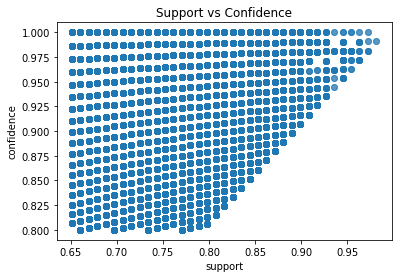

In [ ]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

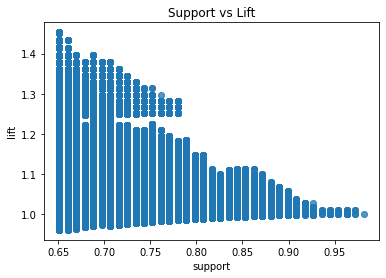

In [ ]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

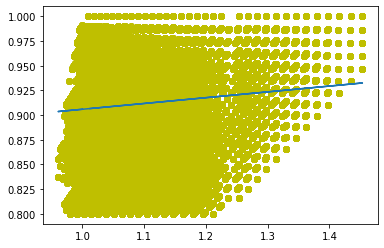

In [ ]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# **Association Analysis - Non Gentrified**

In [ ]:
gent_class = 'nongent'

In [ ]:
df_class = df3[df3['typology'].isin(['1', '2', '3'])].drop(['typology'], axis=1)
df_class = df_class.astype(bool)

In [ ]:
frequent_itemsets = fpgrowth(df_class, min_support=support_cut, use_colnames=True, verbose=1)

16 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (aboverm_per_all_li_00)
3 itemset(s) from tree conditioned on items (aboverm_per_nonwhite_18)
3 itemset(s) from tree conditioned on items (aboverm_per_all_li_90)
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, aboverm_per_all_li_00)
3 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, aboverm_per_nonwhite_18)
6 itemset(s) from tree conditioned on items (aboverm_per_rent_18)
0 itemset(s) from tree conditioned on items (aboverm_per_rent_18, aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (aboverm_per_rent_18, aboverm_per_all_li_00)
3 itemset(s) from tree conditioned on items (aboverm_per_rent_18, aboverm_per_nonwhite_18)
4 itemset(s) from tree conditioned on items (aboverm_per_rent_18, ab

In [ ]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)

### Non-Gentrification Calculate Rule Metrics

In [ ]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_all_li_00),1.000000,0.957346,0.957346,0.957346,1.000000,0.000000,1.000000
1,(aboverm_per_all_li_00),(aboverm_per_all_li_18),0.957346,1.000000,0.957346,1.000000,1.000000,0.000000,inf
2,(aboverm_per_all_li_18),(aboverm_per_nonwhite_18),1.000000,0.930490,0.930490,0.930490,1.000000,0.000000,1.000000
3,(aboverm_per_nonwhite_18),(aboverm_per_all_li_18),0.930490,1.000000,0.930490,1.000000,1.000000,0.000000,inf
4,(aboverm_per_all_li_00),(aboverm_per_nonwhite_18),0.957346,0.930490,0.897314,0.937294,1.007312,0.006514,1.108506
5,(aboverm_per_nonwhite_18),(aboverm_per_all_li_00),0.930490,0.957346,0.897314,0.964346,1.007312,0.006514,1.196344
6,"(aboverm_per_all_li_18, aboverm_per_all_li_00)",(aboverm_per_nonwhite_18),0.957346,0.930490,0.897314,0.937294,1.007312,0.006514,1.108506
7,"(aboverm_per_all_li_18, aboverm_per_nonwhite_18)",(aboverm_per_all_li_00),0.930490,0.957346,0.897314,0.964346,1.007312,0.006514,1.196344
8,"(aboverm_per_nonwhite_18, aboverm_per_all_li_00)",(aboverm_per_all_li_18),0.897314,1.000000,0.897314,1.000000,1.000000,0.000000,inf
9,(aboverm_per_all_li_18),"(aboverm_per_nonwhite_18, aboverm_per_all_li_00)",1.000000,0.897314,0.897314,0.897314,1.000000,0.000000,1.000000


In [ ]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

**Rules with high Lift and Confidence**




In [ ]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [ ]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_all_li_00),1.000000,0.957346,0.957346,0.957346,1.000000,0.000000,1.000000
1,(aboverm_per_all_li_00),(aboverm_per_all_li_18),0.957346,1.000000,0.957346,1.000000,1.000000,0.000000,inf
2,(aboverm_per_all_li_18),(aboverm_per_nonwhite_18),1.000000,0.930490,0.930490,0.930490,1.000000,0.000000,1.000000
3,(aboverm_per_nonwhite_18),(aboverm_per_all_li_18),0.930490,1.000000,0.930490,1.000000,1.000000,0.000000,inf
4,(aboverm_per_all_li_00),(aboverm_per_nonwhite_18),0.957346,0.930490,0.897314,0.937294,1.007312,0.006514,1.108506
5,(aboverm_per_nonwhite_18),(aboverm_per_all_li_00),0.930490,0.957346,0.897314,0.964346,1.007312,0.006514,1.196344
6,"(aboverm_per_all_li_18, aboverm_per_all_li_00)",(aboverm_per_nonwhite_18),0.957346,0.930490,0.897314,0.937294,1.007312,0.006514,1.108506
7,"(aboverm_per_all_li_18, aboverm_per_nonwhite_18)",(aboverm_per_all_li_00),0.930490,0.957346,0.897314,0.964346,1.007312,0.006514,1.196344
8,"(aboverm_per_all_li_00, aboverm_per_nonwhite_18)",(aboverm_per_all_li_18),0.897314,1.000000,0.897314,1.000000,1.000000,0.000000,inf
9,(aboverm_per_all_li_18),"(aboverm_per_all_li_00, aboverm_per_nonwhite_18)",1.000000,0.897314,0.897314,0.897314,1.000000,0.000000,1.000000


In [ ]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_all_li_00),1.000000,0.957346,0.957346,0.957346,1.000000,0.000000,1.000000
1,(aboverm_per_all_li_00),(aboverm_per_all_li_18),0.957346,1.000000,0.957346,1.000000,1.000000,0.000000,inf
2,(aboverm_per_all_li_18),(aboverm_per_nonwhite_18),1.000000,0.930490,0.930490,0.930490,1.000000,0.000000,1.000000
3,(aboverm_per_nonwhite_18),(aboverm_per_all_li_18),0.930490,1.000000,0.930490,1.000000,1.000000,0.000000,inf
4,(aboverm_per_all_li_00),(aboverm_per_nonwhite_18),0.957346,0.930490,0.897314,0.937294,1.007312,0.006514,1.108506
...,...,...,...,...,...,...,...,...,...
60891,"(per_nonwhite_00_dummy_VH, aboverm_per_nonwhit...","(aboverm_per_all_li_18, aboverm_per_nonwhite_9...",0.652449,0.857820,0.652449,1.000000,1.165746,0.092765,inf
60892,"(per_nonwhite_00_dummy_VH, aboverm_per_nonwhit...","(aboverm_per_all_li_18, aboverm_per_nonwhite_0...",0.652449,0.895735,0.652449,1.000000,1.116402,0.068028,inf
60893,"(per_nonwhite_00_dummy_VH, aboverm_per_all_li_18)","(aboverm_per_nonwhite_90, aboverm_per_nonwhite...",0.652449,0.853081,0.652449,1.000000,1.172222,0.095857,inf
60894,"(per_nonwhite_00_dummy_VH, aboverm_per_nonwhit...","(aboverm_per_all_li_18, aboverm_per_nonwhite_0...",0.652449,0.865719,0.652449,1.000000,1.155109,0.087612,inf


In [ ]:
#print( (rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support']))[['antecedents', 'consequents']] )
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
43951,"(aboverm_per_all_li_90, per_all_li_18_dummy_VH...","(low_80120_18_dummy_VH, aboverm_per_nonwhite_0...",0.685624,0.721959,0.685624,1.0,1.385120,0.190632,inf
43954,"(low_80120_18_dummy_VH, aboverm_per_all_li_90,...","(per_all_li_18_dummy_VH, aboverm_per_nonwhite_...",0.685624,0.721959,0.685624,1.0,1.385120,0.190632,inf
45555,"(aboverm_per_nonwhite_90, aboverm_per_all_li_9...","(low_80120_18_dummy_VH, aboverm_per_nonwhite_0...",0.685624,0.721959,0.685624,1.0,1.385120,0.190632,inf
45561,"(aboverm_per_nonwhite_90, aboverm_per_all_li_9...","(per_all_li_18_dummy_VH, aboverm_per_nonwhite_...",0.685624,0.721959,0.685624,1.0,1.385120,0.190632,inf
45612,"(aboverm_per_all_li_90, per_all_li_18_dummy_VH...","(low_80120_18_dummy_VH, low_pdmt_medhhinc_18, ...",0.685624,0.721959,0.685624,1.0,1.385120,0.190632,inf
...,...,...,...,...,...,...,...,...,...
51681,"(low_80120_18_dummy_VH, aboverm_per_rent_18, a...","(aboverm_per_all_li_18, per_all_li_18_dummy_VH...",0.655608,0.731438,0.655608,1.0,1.367171,0.176072,inf
51841,"(aboverm_per_nonwhite_90, per_all_li_18_dummy_...","(low_80120_18_dummy_VH, aboverm_per_nonwhite_00)",0.655608,0.731438,0.655608,1.0,1.367171,0.176072,inf
51845,"(aboverm_per_nonwhite_90, low_pdmt_medhhinc_18...","(per_all_li_18_dummy_VH, aboverm_per_nonwhite_00)",0.655608,0.731438,0.655608,1.0,1.367171,0.176072,inf
51870,"(per_all_li_18_dummy_VH, aboverm_per_rent_18, ...","(low_80120_18_dummy_VH, low_pdmt_medhhinc_18, ...",0.655608,0.731438,0.655608,1.0,1.367171,0.176072,inf


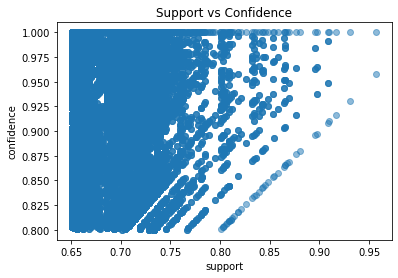

In [ ]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

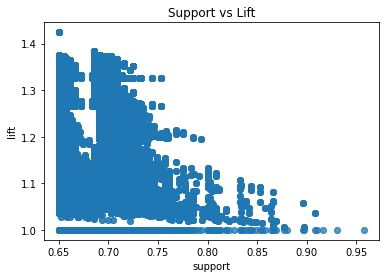

In [ ]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

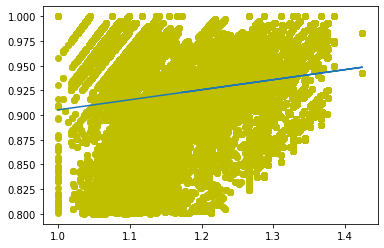

In [ ]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

## Association Analysis - Stable/Exclusive

In [ ]:
gent_class = 'exclusive'

In [ ]:
df_class = df3[df3['typology'].isin([ '7', '8', '9'])].drop(['typology'], axis=1)
df_class = df_class.astype(bool)

In [ ]:
frequent_itemsets = fpgrowth(df_class, min_support=support_cut, use_colnames=True, verbose=1)

11 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (aboverm_real_mrent_00)
1 itemset(s) from tree conditioned on items (aboverm_real_mhval_90)
0 itemset(s) from tree conditioned on items (aboverm_real_mrent_12)
0 itemset(s) from tree conditioned on items (aboverm_real_mrent_90)
0 itemset(s) from tree conditioned on items (aboverm_real_mrent_18)
1 itemset(s) from tree conditioned on items (aboverm_real_mhval_00)
1 itemset(s) from tree conditioned on items (aboverm_per_col_90)
0 itemset(s) from tree conditioned on items (lmh_flag_category_aff_mix_mod)
0 itemset(s) from tree conditioned on items (aboverm_per_col_00)
1 itemset(s) from tree conditioned on items (aboverm_per_col_18)
0 itemset(s) from tree conditioned on items (aboverm_real_mhval_18)


In [ ]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)

In [ ]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_real_mhval_00),(aboverm_real_mhval_90),0.776029,0.760291,0.658596,0.848674,1.116249,0.068588,1.584059
1,(aboverm_real_mhval_90),(aboverm_real_mhval_00),0.760291,0.776029,0.658596,0.866242,1.116249,0.068588,1.674449
2,(aboverm_real_mhval_00),(aboverm_real_mrent_00),0.776029,0.792978,0.697337,0.898596,1.133191,0.081962,2.041553
3,(aboverm_real_mrent_00),(aboverm_real_mhval_00),0.792978,0.776029,0.697337,0.879389,1.133191,0.081962,1.856974
4,(aboverm_per_col_00),(aboverm_per_col_90),0.715496,0.713075,0.675545,0.944162,1.324072,0.165342,5.138565
5,(aboverm_per_col_90),(aboverm_per_col_00),0.713075,0.715496,0.675545,0.947368,1.324072,0.165342,5.405569
6,(aboverm_per_col_00),(aboverm_per_col_18),0.715496,0.700969,0.654964,0.915398,1.305904,0.153423,3.534552
7,(aboverm_per_col_18),(aboverm_per_col_00),0.700969,0.715496,0.654964,0.934370,1.305904,0.153423,4.334937


In [ ]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

In [ ]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [ ]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_real_mhval_00),(aboverm_real_mhval_90),0.776029,0.760291,0.658596,0.848674,1.116249,0.068588,1.584059
1,(aboverm_real_mhval_90),(aboverm_real_mhval_00),0.760291,0.776029,0.658596,0.866242,1.116249,0.068588,1.674449
2,(aboverm_real_mhval_00),(aboverm_real_mrent_00),0.776029,0.792978,0.697337,0.898596,1.133191,0.081962,2.041553
3,(aboverm_real_mrent_00),(aboverm_real_mhval_00),0.792978,0.776029,0.697337,0.879389,1.133191,0.081962,1.856974
4,(aboverm_per_col_00),(aboverm_per_col_90),0.715496,0.713075,0.675545,0.944162,1.324072,0.165342,5.138565
5,(aboverm_per_col_90),(aboverm_per_col_00),0.713075,0.715496,0.675545,0.947368,1.324072,0.165342,5.405569
6,(aboverm_per_col_00),(aboverm_per_col_18),0.715496,0.700969,0.654964,0.915398,1.305904,0.153423,3.534552
7,(aboverm_per_col_18),(aboverm_per_col_00),0.700969,0.715496,0.654964,0.934370,1.305904,0.153423,4.334937


In [ ]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_real_mhval_00),(aboverm_real_mhval_90),0.776029,0.760291,0.658596,0.848674,1.116249,0.068588,1.584059
1,(aboverm_real_mhval_90),(aboverm_real_mhval_00),0.760291,0.776029,0.658596,0.866242,1.116249,0.068588,1.674449
2,(aboverm_real_mhval_00),(aboverm_real_mrent_00),0.776029,0.792978,0.697337,0.898596,1.133191,0.081962,2.041553
3,(aboverm_real_mrent_00),(aboverm_real_mhval_00),0.792978,0.776029,0.697337,0.879389,1.133191,0.081962,1.856974
4,(aboverm_per_col_00),(aboverm_per_col_90),0.715496,0.713075,0.675545,0.944162,1.324072,0.165342,5.138565
5,(aboverm_per_col_90),(aboverm_per_col_00),0.713075,0.715496,0.675545,0.947368,1.324072,0.165342,5.405569
6,(aboverm_per_col_00),(aboverm_per_col_18),0.715496,0.700969,0.654964,0.915398,1.305904,0.153423,3.534552
7,(aboverm_per_col_18),(aboverm_per_col_00),0.700969,0.715496,0.654964,0.934370,1.305904,0.153423,4.334937


In [ ]:
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(aboverm_per_col_90),(aboverm_per_col_00),0.713075,0.715496,0.675545,0.947368,1.324072,0.165342,5.405569
4,(aboverm_per_col_00),(aboverm_per_col_90),0.715496,0.713075,0.675545,0.944162,1.324072,0.165342,5.138565
7,(aboverm_per_col_18),(aboverm_per_col_00),0.700969,0.715496,0.654964,0.934370,1.305904,0.153423,4.334937
6,(aboverm_per_col_00),(aboverm_per_col_18),0.715496,0.700969,0.654964,0.915398,1.305904,0.153423,3.534552
2,(aboverm_real_mhval_00),(aboverm_real_mrent_00),0.776029,0.792978,0.697337,0.898596,1.133191,0.081962,2.041553
3,(aboverm_real_mrent_00),(aboverm_real_mhval_00),0.792978,0.776029,0.697337,0.879389,1.133191,0.081962,1.856974
1,(aboverm_real_mhval_90),(aboverm_real_mhval_00),0.760291,0.776029,0.658596,0.866242,1.116249,0.068588,1.674449
0,(aboverm_real_mhval_00),(aboverm_real_mhval_90),0.776029,0.760291,0.658596,0.848674,1.116249,0.068588,1.584059
